# CS341 Project 4: Genetic Algorithms

Your first goal is to analyze the performance of several genetic algorithms in the context of parameter-estimation. Your second goal is to analyze the results, i.e. what do we learn about the model? In this project, we are revisiting Goldbeter's 5-state fly clock model, whose parameters were originally chosen "by hand." You will use a cost function which ensures the oscillations in constant darkness have a period of 23.6 hours.

There are many, many variants of genetic algorithms. We will be using the following algorithm.

<ul>
    <li>Create an initial population of $\lambda$ individuals $G^0$ and generate their costs.
    <li>Sort the individuals in $G^0$ by cost (in preparation for selection)
    <li>For each generation $g$
        <ul>
        <li>Take the $eliteCount$ best children from the previous generation $G^{g-1}$ and put them into this generation $G^g$
            <li><b>Select</b> the breeding pool $P$ of $\mu$ individuals from the previous generation.
        <li>For i in range($eliteCount$,$\lambda$)
            <ul>
            <li>Randomly choose two parents from $P$.
            <li>Use <b>cross-over</b> to generate a child $G^g_i$.
            <li><b>Mutate</b> the values in $G^g_i$.
            <li>Compute the child's cost.
            </ul>
        <li>Sort the individuals in $G^g$ by cost (in preparation for selection)
        </ul>
</ul>   

The key operators and parameters can be varied:
<ul>
    <li>Selection can favor fit (low-cost) parents more or less, and always has an aspect of randomness. If we favor low-cost parents more, then the algorithm converges quickly, but it doesn't explore parameter space very well, and could miss a more fit individual. If we favor them less, the algorithm might not find children of increasingly good fitness. Explanations of several selection operators may be found in: Blickle, T. and Thiele, L. 1995. A comparison of selection schemes used in genetic algorithms. Tech. Rep. TIK-Report 11, Swiss Federal Institute of Technology (ETH), Zurich, Switzerland, May.
    <li>Crossover is typically "uniform" (each element of the child is randomly taken from one of its two parents) or "single" (a cross-over point is selected and all elements up to the cross-over point are taken from one parent and the remaining elements are taken from the second parent).
    <li>Mutation is typically implemented by choosing a value from a Gaussian distribution centered on each element. One straightforward way to vary the mutation is to vary the width of the distribution. We control the size of the mutation by scaling the width of the Gaussian distribution (it should be $mutationScale\cdot parameterValue$).
    <li>The number of parents $\mu$ and children $\lambda$ affects how widely we can sample space. Large numbers of children allow for a broader sampling. The number of parents (the size of the breeding pool) should be a fraction of the number of children (typically, it is a number like 1/5). It works with the selection operator to control how broadly the space is searched and how quickly the algorithm progresses towards a solution. The number of children that you need to use depends upon the problem. It can range from in the tens (e.g. our simple island cost function from class) to thousands.
    <li>The number of elite individuals should be small (e.g. 1 to 3). Including elites guarantees that the best-fit individual in generation $g$ will be at least as fit as the best-fit individual in generation $g-1$.
    <li>The number of generations should be as big as it needs to be for the best (or average) cost to stop improving. For some problems, thousands of generations are used. Here, we are able to use many fewer (e.g. I used 5 for the simple island cost function in class)
</ul>  

## Algorithm Performance

<ol>
<li> Run each algorithm on the fly model at least 5 times for each ``flavor'' for at least 5 generations,  i.e. analyze performance for 
	<ol>
    <li> a GA with truncation selection, an elite count of 1, 10 parents, 50 children, and a mutation scale of 0.05
	<li> a GA with tournament selection (tournament size = 2), an elite count of 1, 10 parents, 50 children, and a mutation scale of 0.05
	<li> a GA with linear ranking selection, an elite count of 1, 10 parents, 50 children, and a mutation fraction of 0.05
    </ol>
<li> Report your results in a concise, but informative manner. You will want to identify trends. To do this, quantify the performance of the algorithm. For example, determine the mean population cost for each generation and plot how that changes across generations.
</ol>

## Implication for Model
Using some of your output from above, analyze the effects of different parameters on the model's performance. Below are suggestions to guide your analysis. Follow at least one of them.

<ol>
<li> How different are the optimization results? i.e. how different are the sets of model parameters (e.g. rate constants and activation thresholds) that are found by different runs of the GA?  
<li> You may see different relationships between amplitudes of clock components. Do you see any patterns in this behavior? (e.g. is the peak mRNA concentration always bigger (or always smaller) than the peak P1 concentration?) If so, maybe you can conclude that the relative amplitude is not a property of the model's parameters, but that it is a property of its structure. Make a detailed case for your conclusion.
<li> Choose several optimization results and determine whether or not the non-intuitive behavior mentioned in Goldbeter's paper occurs. In his paper, he showed that increasing the rate of Per protein degradation ($v_d$) increases the total PER in the system. Is this true for multiple optimization results (i.e. model parameter sets)?
</ol>

## Extensions

<ul>
<li> Implement proportional selection and include analysis of the GA with proportional selection it in your write-up.
<li> Include additional analysis with different values of the algorithm's parameters. What happens if the number of children per generation is different? What about increasing or decreasing the mutation fraction?
<li> Include simulated annealing in your set of optimization algorithms.
<li> Implement a simulated annealing optimization algorithm.
<li> Make a hybrid algorithm that uses both a GA (or simulated annealing) and a deterministic method (e.g. a hill-descending method). The idea is that the stochastic algorithms helps you find the right region of parameter space, and that in that region, the cost function will be smooth (and maybe even monotonic). Once we are in a region that is smooth and monotonic, we can use a deterministic optimization method to refine our parameter set to find the local optimum.
<li> Include amplitude in the cost function for Goldbeter's model: add a penalty for each state variable whose peak-to-trough amplitude is less than 0.1.
<li> Also find parameters for the Gonze/Goodwin oscillator.
</ul>


## Steps to get you started
### 1. Cost function for fly clock model

To write the cost function for the fly clock model, you will need gol95_model and get_period from project 2. 

Your cost function should have the signature:
<code>
def gol95_cost( params ):    
</code>

where params is the ndarray of parameters used to simulate the model.

It should
<ul>
    <li>Run the simulation with params as the parameters for at least 10 days, so that it is likely to have reached the limit cycle.
    <li>Re-run the simulation, beginning with the values from the final time step of the previous simulation.
    <li>Compute the period $per$ and the cycle-to-cycle standard deviation of the period $sdper$ by calling get_period.
    <li>Compute the cost according to
        $\sqrt{ \left(\frac{per-23.6}{23.6}\right)^2 + \frac{sdper}{23.6}}$
</ul>


In [1]:
# Write your code here (copy-paste the model and get_period, write gol95_cost)
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# model
def gol_95(t,y,params):
    '''

    '''

    # Unpacking Params(18)
    v_s = params[0]
    v_m = params[1]
    K_m = params[2]
    k_s = params[3]
    v_d = params[4]
    k_1 = params[5]
    k_2 = params[6]
    K_I = params[7]
    K_d = params[8]
    n = params[9]
    K_1 = params[10]
    K_2 = params[11]
    K_3 = params[12]
    K_4 = params[13]
    V_1 = params[14]
    V_2 = params[15]
    V_3 = params[16]
    V_4 = params[17]

    #Unpacking Y
    M = y[0]
    P_0 = y[1]
    P_1 = y[2]
    P_2 = y[3]
    P_N = y[4]

    #Calculating the 5 differential equations
    dM_dt = v_s * K_I**n/(K_I**n + P_N**n)  -  v_m * M / (K_m + M)
    dP_0_dt = k_s * M  -  V_1*P_0/(K_1+P_0)  +  V_2 * P_1/(K_2+P_1)
    dP_1_dt =  V_1*P_0/(K_1+P_0) - V_2 * P_1/(K_2+P_1) - V_3 * P_1/(K_3+P_1) + V_4*P_2/(K_4+P_2)
    dP_2_dt = V_3 * P_1/(K_3+P_1) - V_4*P_2/(K_4+P_2) - k_1*P_2 + k_2*P_N - v_d * P_2/(K_d+P_2)
    dP_N_dt = k_1*P_2 - k_2*P_N

    return (dM_dt,dP_0_dt,dP_1_dt,dP_2_dt,dP_N_dt)

In [3]:
def get_period(t,x):
     """ Approximate the period of a 1-D x, given the time-steps t.
         Returns a tuple with the period and the standard deviation of
the period over time.
         if the value of the standard deviation is not smaller than 0.1,
then
         it means the period estimate is dodgy and you shouldn't use it.
Instead,
         plot your simulation and figure out why it isn't periodic -
maybe it just
         hasn't reached the limit cycle yet."""
     idxs = scipy.signal.find_peaks(x)
     idxs = idxs[0]
     times = t[idxs]
     periods = np.diff(times)
     period = periods.mean()
     sdperiod = periods.std()

     return (period,sdperiod)

In [4]:
def gol95_cost( params ):
    '''
    :param params: the ndarray of parameters used to simulate the gol model. (For gol_95, this is 18 parameters)
    :return: the cost of the gol_95 model

    This function will:
        1. Run the simulation with params as the parameters for at least 10 days,
           so that it is likely to have reached the limit cycle.
        2. Re-run the simulation, beginning with the values from the final
           time step of the previous gol_95 simulation
        3. Compute the period and the cycle-to-cycle standard deviation of the period
           by calling get_period.
        4. Compute the cost with the formula cost = (((period - 23.6)/23.6)^2 + sdperiod/23.26)^0.5
    '''

    # Run the simulation with params as the parameters for at least 10 days,
    # so that it is likely to have reached the limit cycle. (Here each timestep is an hour)

    # Initial conditions
    M_0 = 1.9
    P_0_0 = 0.8
    P_1_0 = 0.8
    P_2_0 = 0.8
    P_N_0 = 0.8
    y0 = (M_0,P_0_0,P_1_0,P_2_0,P_N_0)

    # Time points
    days_to_run = 10
    t = np.linspace(0,24*days_to_run,24*days_to_run)

    # Run the simulation
    sol = scipy.integrate.solve_ivp(lambda t,y: gol_95(t,y,params),[0,24*days_to_run],y0,method='RK45',t_eval=t)

    ### TODO Question when is this used
    # sol2 = scipy.integrate.odeint(gol_95, y0, t, args=(params,))

    # Re-running the simulation, beginning with the values from the final timestep of the previous
    # gol_95 simulation
    y0 = sol.y[:,-1]
    sol = scipy.integrate.solve_ivp(lambda t, y: gol_95(t, y, params), [0, 24 * days_to_run], y0, method='RK45',
                                    t_eval=t)

    # Computing the period and the cycle-to-cycle standard deviation of the period
    period, sdperiod = get_period(sol.t,sol.y[4,:])
    cost = (((period - 23.6)/23.6)**2 + sdperiod/23.26)**0.5

    return cost

In [5]:
# Test your cost function here.
# When Stephanie tests hers with the parameters from Project 2, her cost is < 0.05

# Setting up the gol_95 parameters
v_s = 0.76
v_m = 0.65
K_m = 0.5
k_s = 0.38
v_d = 0.95
k_1 = 1.9
k_2 = 1.3
K_I = 1
K_d = 0.2
n = 4
K_1 = 2
K_2 = 2
K_3 = 2
K_4 = 2
V_1 = 3.2
V_2 = 1.58
V_3 = 5
V_4 = 2.5
gol_95_params = (v_s, v_m, K_m, k_s, v_d, k_1, k_2, K_I, K_d, n,
                 K_1, K_2, K_3, K_4, V_1, V_2, V_3, V_4)

gol95_cost(gol_95_params)


0.14648436521573235

### 2. Selection operator

Write your selection operators in this cell, so that you can test them with artificial data. I have included a barebones operator along with test code below. The uniform operator is a useless one, because it applies no selection pressure. The test code has costs ranging from 0.1 to 500 and the uniform operator samples from them all, so the histogram of costs from the breeding pool should indicate a uniform distribution from 0.1 to 500. 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

class GASettings:
    def __init__( self, numParents = 10, numChildren = 50 ):
        self.numParents = numParents;
        self.numChildren = numChildren;
        self.numGenerations = 5;
        self.selection = 'truncation'; 
        self.slope = 15; # for linear ranking selection
        self.tournamentSize = 2;
        self.crossover = 'uniform';
        self.mutation = 0.05; # std of normal distribution computed as mutation*value
        self.eliteCount = 1;


def select_pool( G, Gcost, settings ):
    """ Select a breding pool from the previous generation.
    G is numChildren x numParameters
    Gcost is numChildren long and is sorted in ascending order.
    Returns (P,Pcost)
    where 
    P is numParents x numParameters
    Pcost is numParents long.
    """
    if Gcost.size != settings.numChildren:
        print("problem")
        return
    P = np.zeros( (settings.numParents,G.shape[1]) )
    Pcost = np.zeros( (settings.numParents,) )

    if settings.selection == 'uniform':
        for i in range(settings.numParents):
            idx = np.random.choice(G.shape[0])
            P[i,:] = G[idx,:]
            Pcost[i] = Gcost[idx]

    elif settings.selection == 'truncation':
        for i in range(settings.numParents):
            idx = np.random.choice(settings.numParents)
            P[i,:] = G[idx,:]
            Pcost[i] = Gcost[idx]

    elif settings.selection == "linearRanking":
        r = settings.slope
        n = settings.numChildren
        pn = 2/n*(1/(1+r))
        p1 = r*pn
        ps = np.zeros((n,))
        for i in range(1,n+1):
            ps[i-1] = pn + (p1-pn)*(n-i)/(n-1)
        cs = ps.cumsum()

        for i in range( settings.numParents ):
            num = np.random.random() # number between 0 and 1, from uniform distribution
            idx = np.argmax( num < cs )
            P[i,:] = G[idx,:]
            Pcost[i] = Gcost[idx]

    elif settings.selection == 'tournament':
        for i in range( settings.numParents ):
            idxs = np.random.choice(G.shape[0], (settings.tournamentSize,) )
            # pick the best one, which is smaller index (since costs sorted)
            idx = idxs.min()
            P[i,:] = G[idx,:]
            Pcost[i] = Gcost[idx]

    else:
        print( "Unknown selection operator: ", settings.selection )
    return (P, Pcost)


Text(0, 0.5, 'Frequency')

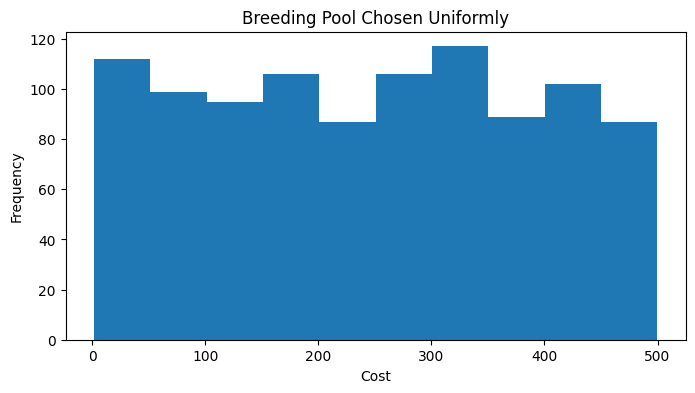

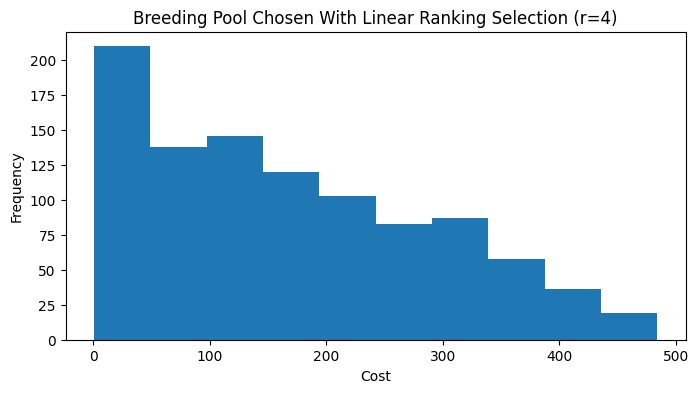

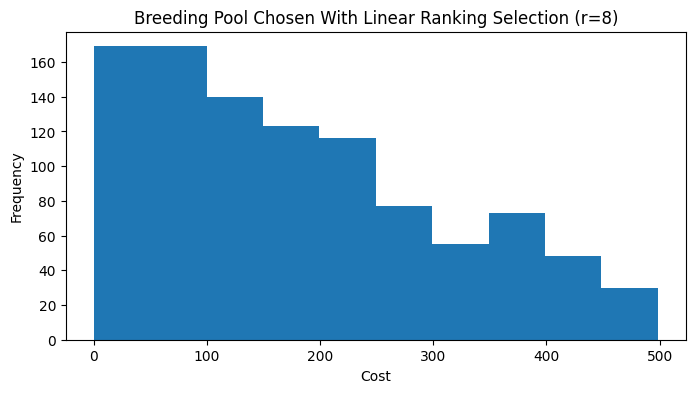

In [7]:

# Test the selection operators
# Make fake parameters, using the index as the values (so we can differentiate them)
lam = 10000 # number of individuals in generation
mu = 1000 # number of individuals in breeding pool
NP = 5 # num of parameters per individual
G = np.zeros( (lam,NP) )
for i in range(lam):
    G[i,:] = i
Gcost = np.linspace(0.1,500,lam)
settings = GASettings(numParents=mu, numChildren=lam)

settings.selection = 'uniform'
(P, Pcost) = select_pool(G, Gcost, settings)
plt.figure( figsize=(8,4) )
plt.hist( Pcost );
plt.title( "Breeding Pool Chosen Uniformly")
plt.xlabel( 'Cost')
plt.ylabel('Frequency')

settings.selection = 'linearRanking'
settings.linearRankingRatio = 4
(P, Pcost) = select_pool(G, Gcost, settings)
plt.figure( figsize=(8,4) )
plt.hist( Pcost );
plt.title( "Breeding Pool Chosen With Linear Ranking Selection (r=4)")
plt.xlabel( 'Cost')
plt.ylabel('Frequency')

settings.selection = 'linearRanking'
settings.linearRankingRatio = 8
(P, Pcost) = select_pool(G, Gcost, settings)
plt.figure( figsize=(8,4) )
plt.hist( Pcost );
plt.title( "Breeding Pool Chosen With Linear Ranking Selection (r=8)")
plt.xlabel( 'Cost')
plt.ylabel('Frequency')



### 3. Test cross-over and mutation

Stephanie puts cross-over and mutation in a function named generateChild. The input to generateChild is the cost function, the breeding pool, the lower bounds, the upper bounds, and the settings. You can test it by generating an artificial breednig pool, such as one in which the first individual is an array of all 1's, the second is all 2's etc. Then, if you print out the results, which two individuals were chosen, how the cross-over was done and how the mutation worked should be clear.

In [8]:
# Write your code for testing cross-over and mutation here.
# code to generate child
def generateChild(cost_fcn, P, lb, ub, settings):
    """
    Generate a viable child (i.e one whos cost function is finite)
    and return it and its cost function.
    If 1000 tries fails to yield a parent, then an infinite cost
    is returned.
    Input Parameters:
        cost_fcn: handle to the cost function (which should take a candidate as input)
        P: parents (lam x NP ndarray of parameter values)
        lb: lower bounds for parameters (array of length NP)
        ub: upper bounds for parameters (array of length NP)
        settings: a GASettings object
    Returns:
        (params, cost)
        where params is the same shape as the lower bounds
        and cost is the cost for that set of parameters
    """

    params = np.zeros(lb.shape);
    cost   = np.inf;
    for i in range(1000):

        # Choose two parents from the breeding pool.
        P1idx = np.random.choice(P.shape[0]);
        P1  = P[P1idx,:];
        P2idx = np.random.choice(P.shape[0]);
        P2  = P[P2idx,:];

        for j in range(lb.size):
            # uniform cross-over
            if np.random.random() < 0.5:
                params[j] = P1[j];
            else:
                params[j] = P2[j];
        # Mutate optimization variables
        params = np.multiply( 1+np.random.randn(params.size)*settings.mutation, params);
        # Make sure the mutation hasn't moved us out of bounds
        params = np.maximum(params,lb);
        params = np.minimum(params,ub);

        # get the cost
        cost   = cost_fcn(params);
        if np.isfinite(cost):
            return ( params, cost );

    return (np.zeros((lb.size)), np.inf)

### 4. Write your Genetic Algorithm

Write it according to the algorithm above and what we have done in class.

Test it with the simple island cost function from class.

In [9]:
# generateIndividual
def generateIndividual(cost_fcn, lb,ub):
    '''
    Generate a viable individual (i.e one whos cost function is finite)
    and return it and its cost.
    If 1000 tries fails to yield an individual, then the paramets and an infinite cost
    are returned.
    Each individual is generated by randomly chosing each entry params[i]
    so that lb[i] <= params[i] <= ub[i]
    Input:
        cost_fcn: handle to the cost function (which should take a candidate as input)
        lb: lower bounds for parameters (array of length NP)
        ub: upper bounds for parameters (array of length NP)
    Returns:
        (params, cost)
        where params is the same shape as the lower bounds
        and cost is the cost for that set of parameters
    '''
    params = np.zeros(lb.shape);
    cost   = np.inf;
    for i in range( 1000 ):
        params = lb + np.multiply( np.random.random(lb.size), ub-lb);
        cost   = cost_fcn(params);
        if np.isfinite(cost):
            return (params, cost);
    return (params, np.inf)


In [10]:
# Your GA code goes here! Copy-paste the simple island cost function from the Jupyter notebook from class.


def GA(cost_fcn, lb, ub, settings):
    """ Run the algorithm described in the notes to find a low-cost
        population of parameter sets.
        Input:
            cost_fcn: handle to cost function (should take a paramer set as input)
            lb: lower bounds for parameters (numpy array of length NP)
            ub: lower bounds for parameters (numpy array of length NP)
            settings: GASettings object
        Returns
            (params, cost, all_params, all_costs)
            where
            params is a 1xNP vector with the best parameter set found
            cost is a scalar with the cost of the best parameter set
            all_params is a list with a (settings.numChildren x NP) ndarray of parameters for each generation
            all_costs is a list with an NP-length array of costs for each generation
    """

    mu = settings.numParents;
    lam = settings.numChildren;
    numGenerations = settings.numGenerations;

    # Create initial population
    G = np.zeros( (lam,lb.size) );
    Gcost = np.zeros( (lam,) );
    for i in range(lam):
        (G[i,:], Gcost[i]) = generateIndividual(cost_fcn, lb, ub);

    # sort them by cost
    idx   = np.argsort(Gcost);
    Gcost = Gcost[idx]
    G     = G[idx,:];
    all_params = [G]
    all_costs = [Gcost]

    for g in range(numGenerations):
        # Promote any elites
        elites = G[:settings.eliteCount,:]
        eliteCosts = Gcost[:settings.eliteCount]

        # select breeding pool
        (P, Pcost) = select_pool( G, Gcost, settings )

        # Generate the children for generation g
        G = np.zeros((lam, lb.size));
        Gcost = np.zeros((lam,));
        G[:settings.eliteCount,:] = elites
        Gcost[:settings.eliteCount] = eliteCosts
        for i in range(settings.eliteCount,lam):
           (G[i,:], Gcost[i]) = generateChild(cost_fcn, P, lb, ub, settings);

        # sort the children of this generation
        idx   = np.argsort(Gcost);
        Gcost = Gcost[idx]
        G     = G[idx,:];
        print('Best of generation ', g+1, ' has cost ', Gcost[0]);
        all_params.append(G)
        all_costs.append(Gcost)

    params = G[0,:];
    cost   = Gcost[0];
    return (params, cost, all_params, all_costs)

### 5. Run your Genetic Algorithm on the Fly Clock Model

Below, I supply code that generates the upper and lower bounds for the parameters. The rest is up to you.

In [11]:
# Code with lower and upper bounds the parameters in Goldbeter's fly clock model.
# I put the published values in comments.

lb = np.zeros((18,));
ub = np.zeros((18,));
lb[0] = 0;   ub[0] = 1;# vs = 0.76;
lb[1] = 0;   ub[1] = 1;# vm = 0.65;
lb[2] = .1;  ub[2] = 1;# Km = 0.5;
lb[3] = 0;   ub[3] = 1;# ks = 0.38;
lb[4] = 0;   ub[4] = 1;# vd = 0.95;
lb[5] = 0;   ub[5] = 2;# k1 = 1.9;
lb[6] = 0;   ub[6] = 2;# k2 = 1.3;
lb[7] = 1;   ub[7] = 1;# KI = 1;
lb[8] = 0.1; ub[8] = 1;# Kd = 0.2;
lb[9] = 4;  ub[9] = 4;# n = 4;
lb[10] = 0.5;  ub[10] = 2.5;# K1 = 2;
lb[11] = 0.5;  ub[11] = 2.5;# K2 = 2;
lb[12] = 0.5;  ub[12] = 2.5;# K3 = 2;
lb[13] = 0.5;  ub[13] = 2.5;# K4 = 2;
lb[14] = 0;  ub[14] = 5;# V1 = 3.2;
lb[15] = 0;  ub[15] = 5;# V2 = 1.58;
lb[16] = 0;  ub[16] = 5;# V3 = 5;
lb[17] = 0;  ub[17] = 5;# V4 = 2.5;


   ## Begin your project here
   
  Complete the project (analyzing the algorithm's performance and the parameters output) here. You can add your new selection operators to the code in cells above. Just concentrate main code for the report here.


### Algorithms:

To analyze the different algorithms we will run them 5 times for 5 generations and save them to *npz* files

#### Algorithm 1:

This algorithm is a GA with truncation selection, an elite count of 1, 10 parents, 50 children, and a mutation scale of 0.05.

In [12]:

for run_num in range(1,6):
    alg_1 = GASettings(numParents=10, numChildren=50)
    alg_1.selection = 'truncation'
    alg_1.eliteCount = 1
    alg_1.numParents = 10
    alg_1.numParents = 50
    alg_1.mutation = 0.05
    alg_1_results = GA(gol95_cost,lb,ub,alg_1)
    np.savez(f"alg_1_all_params_run_{run_num}", alg_1_results[])


/var/folders/fh/klqyc48n6wg85_j21_wvq8yw0000gn/T/ipykernel_1251/1666051146.py:16: RuntimeWarning: Mean of empty slice.
  period = periods.mean()
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best of generation  1  has cost  0.7368363633389213
Best of generation  2  has cost  0.7021487837742009
Best of generation  3  has cost  0.7021487837742009
Best of generation  4  has cost  0.7021487837742009
Best of generation  5  has cost  0.6319713813295769


/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Best of generation  1  has cost  0.021204169917032004
Best of generation  2  has cost  0.021204169917032004
Best of generation  3  has cost  0.021204169917032004
Best of generation  4  has cost  0.021204169917032004
Best of generation  5  has cost  0.021204169917032004
Best of generation  1  has cost  0.06375434366357302
Best of generation  2  has cost  0.06375434366357302
Best of generation  3  has cost  0.06375434366357302
Best of generation  4  has cost  0.06375434366357302
Best of generation  5  has cost  0.06375434366357302
Best of generation  1  has cost  0.158530688828191
Best of generation  2  has cost  0.1567814366042714
Best of generation  3  has cost  0.1567814366042714
Best of generation  4  has cost  0.13058265398723332
Best of generation  5  has cost  0.13058265398723332
Best of generation  1  has cost  0.18915269651144412
Best of generation  2  has cost  0.18915269651144412
Best of generation  3  has cost  0.18915269651144412
Best of generation  4  has cost  0.1891526965

##### Generational Cost Analysis:


{'bodies': [<matplotlib.collections.PolyCollection at 0x7f7cf0e8d990>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7f7cf0e4e4a0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f7cf0e95d50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f7cf0e961a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f7cf0e965f0>}

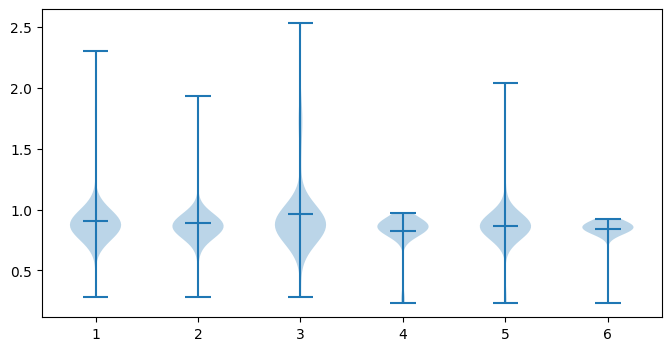

In [38]:
plt.figure(figsize= (8,4))
plt.violinplot(dataset = alg_1_results[3],
               showmeans=True)

#### Algorithm 2:
GA with tournament selection (tournament size = 2), an elite count of 1, 10 parents, 50 children, and a mutation scale of 0.05

In [13]:
for run_num in range(1,6):
    alg_2 = GASettings(numParents=10, numChildren=50)
    alg_2.selection = 'tournament'
    alg_2.eliteCount = 1
    alg_2.numParents = 10
    alg_2.numParents = 50
    alg_2.mutation = 0.05
    alg_2_results = GA(gol95_cost,lb,ub,alg_2)
    np.savez(f"alg_2_results_run_{run_num}", alg_2_results)

/var/folders/fh/klqyc48n6wg85_j21_wvq8yw0000gn/T/ipykernel_1251/1666051146.py:16: RuntimeWarning: Mean of empty slice.
  period = periods.mean()
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best of generation  1  has cost  0.3081569612865656
Best of generation  2  has cost  0.06389617757606168
Best of generation  3  has cost  0.06389617757606168
Best of generation  4  has cost  0.06389617757606168
Best of generation  5  has cost  0.06389617757606168


/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Best of generation  1  has cost  0.13449816729913902
Best of generation  2  has cost  0.13449816729913902
Best of generation  3  has cost  0.13449816729913902
Best of generation  4  has cost  0.13449816729913902
Best of generation  5  has cost  0.13449816729913902
Best of generation  1  has cost  0.10644635132260229
Best of generation  2  has cost  0.10644635132260229
Best of generation  3  has cost  0.10644635132260229
Best of generation  4  has cost  0.021346003829526353
Best of generation  5  has cost  0.021346003829526353
Best of generation  1  has cost  0.16687197849208274
Best of generation  2  has cost  0.06375434366357341
Best of generation  3  has cost  0.06375434366357341
Best of generation  4  has cost  0.06375434366357341
Best of generation  5  has cost  0.06375434366357341
Best of generation  1  has cost  0.06389617757606146
Best of generation  2  has cost  0.06375434366357302
Best of generation  3  has cost  0.06375434366357302
Best of generation  4  has cost  0.063754343

#### Algorithm 3:
GA with linear ranking selection, an elite count of 1, 10 parents, 50 children, and a mutation fraction of 0.05

In [14]:
for run_num in range(1,6):
    alg_3 = GASettings(numParents=10, numChildren=50)
    alg_3.selection = 'linearRanking'
    alg_3.eliteCount = 1
    alg_3.numParents = 10
    alg_3.numParents = 50
    alg_3.mutation = 0.05
    alg_3_results = GA(gol95_cost,lb,ub,alg_3)
    np.savez(f"alg_3_results_run_{run_num}", alg_3_results)



/var/folders/fh/klqyc48n6wg85_j21_wvq8yw0000gn/T/ipykernel_1251/1666051146.py:16: RuntimeWarning: Mean of empty slice.
  period = periods.mean()
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Best of generation  1  has cost  0.14283853646916775
Best of generation  2  has cost  0.14283853646916775
Best of generation  3  has cost  0.14283853646916775
Best of generation  4  has cost  0.14283853646916775
Best of generation  5  has cost  0.14283853646916775


/Users/matthewbass/opt/anaconda3/envs/CS341_3_10/lib/python3.10/site-packages/numpy/lib/npyio.py:716: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


Best of generation  1  has cost  0.13746677272682892
Best of generation  2  has cost  0.13746677272682892
Best of generation  3  has cost  0.13746677272682892
Best of generation  4  has cost  0.12848623112893892
Best of generation  5  has cost  0.10630451741011447
Best of generation  1  has cost  0.16899747989014535
Best of generation  2  has cost  0.13265077825915603
Best of generation  3  has cost  0.13265077825915603
Best of generation  4  has cost  0.13265077825915603
Best of generation  5  has cost  0.13265077825915603
Best of generation  1  has cost  0.14701660585222173
Best of generation  2  has cost  0.14038512031521352
Best of generation  3  has cost  0.14038512031521352
Best of generation  4  has cost  0.06389617757605763
Best of generation  5  has cost  0.06389617757605763
Best of generation  1  has cost  0.13449816729913908
Best of generation  2  has cost  0.13449816729913908
Best of generation  3  has cost  0.13064682763577692
Best of generation  4  has cost  0.11933215506

### Algorithm Analysis:


### Implications:


In [16]:
alg_1_results = np.load('alg_1_results_run_1.npz')



<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*